In [74]:
from getpass import getpass
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import db_builder.db_handler as dbh
import logging
import seaborn as sns 

logging.getLogger('sqlalchemy').setLevel(logging.WARNING)
db_params = {
    'user': 'postgres',
    'password': getpass('Please enter DB pw'),  # enter your DB password
    'host': 'localhost',  # 'localhost' or IP address
    'port': '5432',  # '5432'
    'database': 'ttdatabase',  #tensionTerminator
}
toolcheck = dbh.DB_Conn(db_params)
toolcheck.connect()
engine = toolcheck.get_engine()

Connected to PostgreSQL, DB: ttdatabase


In [75]:
def table_to_df(tabel_name: str):
    return pd.read_sql_table(tabel_name, con=engine)

In [76]:
def get_tools(id):
    tools_df = table_to_df('tools')
    tool_loc = tools_df.loc[tools_df['id'] == id].values
    return f"{tool_loc[0][1]}"

In [77]:
tools_loop_association_df = table_to_df('tools_loop_association').dropna()
tools_df = table_to_df('tools').dropna()

2023-11-28 20:05:11,650 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-11-28 20:05:11,651 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-28 20:05:11,652 INFO sqlalchemy.engine.Engine select current_schema()
2023-11-28 20:05:11,653 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-28 20:05:11,655 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-11-28 20:05:11,655 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-28 20:05:11,656 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-28 20:05:11,659 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

In [79]:
tools_df

,id,tool,time_in_use
4,5,duoballs,00:00:43
5,6,trigger,00:00:35
6,7,duoballs,00:01:11
7,8,trigger,00:00:49
8,9,duoballs,00:00:00
9,10,trigger,00:01:38
10,11,duoballs,00:01:20
11,12,trigger,00:00:43
12,13,duoballs,00:01:43
13,14,trigger,00:00:00


In [80]:
count = tools_df.groupby(['tool', 'time_in_use']).size().reset_index(name='Count')
count

,tool,time_in_use,Count
0,duoballs,00:00:00,5
1,duoballs,00:00:10,1
2,duoballs,00:00:35,1
3,duoballs,00:00:43,1
4,duoballs,00:00:47,1
5,duoballs,00:00:51,1
6,duoballs,00:01:00,1
7,duoballs,00:01:08,1
8,duoballs,00:01:10,1
9,duoballs,00:01:11,1


In [81]:
tools_df['time_in_use'] = pd.to_datetime(tools_df['time_in_use'], format='%H:%M:%S')
tools_df['time_in_use_seconds'] = tools_df['time_in_use'].dt.hour * 3600 + tools_df['time_in_use'].dt.minute * 60 + tools_df['time_in_use'].dt.second

tools_df

,id,tool,time_in_use,time_in_use_seconds
4,5,duoballs,1900-01-01 00:00:43,43
5,6,trigger,1900-01-01 00:00:35,35
6,7,duoballs,1900-01-01 00:01:11,71
7,8,trigger,1900-01-01 00:00:49,49
8,9,duoballs,1900-01-01 00:00:00,0
9,10,trigger,1900-01-01 00:01:38,98
10,11,duoballs,1900-01-01 00:01:20,80
11,12,trigger,1900-01-01 00:00:43,43
12,13,duoballs,1900-01-01 00:01:43,103
13,14,trigger,1900-01-01 00:00:00,0


In [82]:
# Assuming 'tools_df' is your DataFrame

time_sum_per_tool = tools_df.groupby('tool')['time_in_use_seconds'].sum().reset_index()
time_sum_per_tool


,tool,time_in_use_seconds
0,duoballs,1423
1,trigger,1181


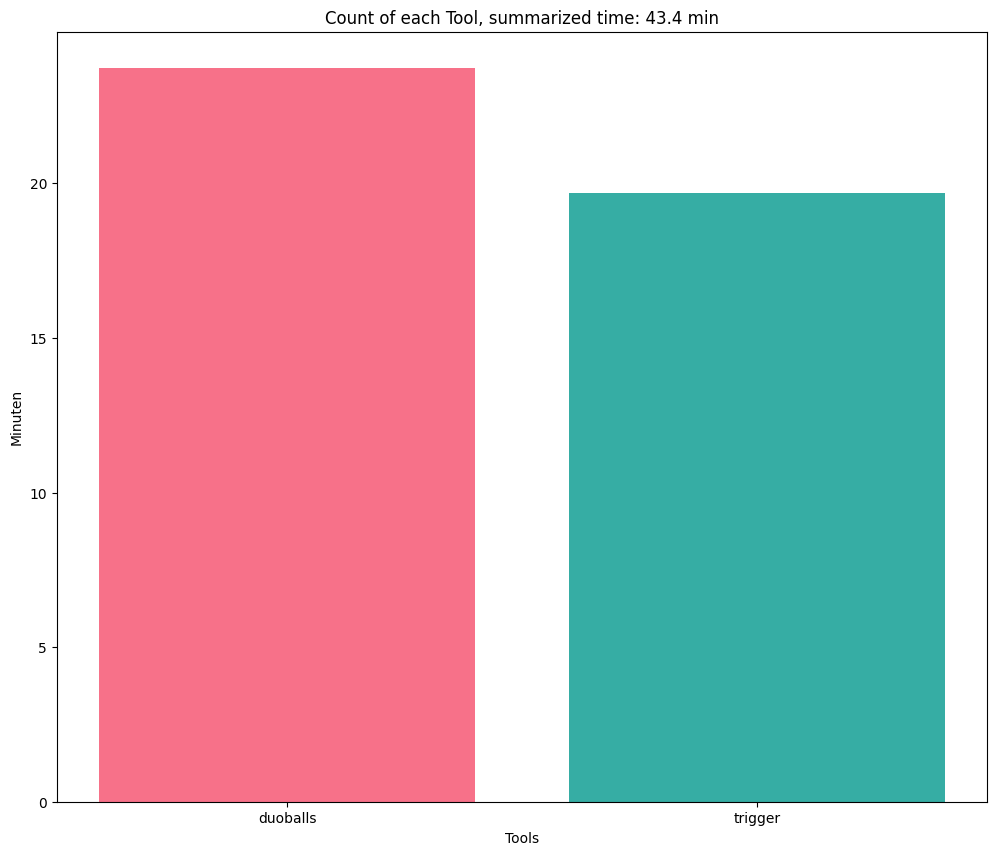

In [89]:
colors = sns.color_palette('husl', n_colors=len(time_sum_per_tool))

plt.figure(figsize=(12, 10))

plt.bar(time_sum_per_tool['tool'], time_sum_per_tool['time_in_use_seconds']/60, color=colors)

plt.xlabel('Tools')
plt.ylabel('Minuten')
plt.title(f"Count of each Tool, summarized time: {time_sum_per_tool['time_in_use_seconds'].sum()/60} min")

plt.show()
